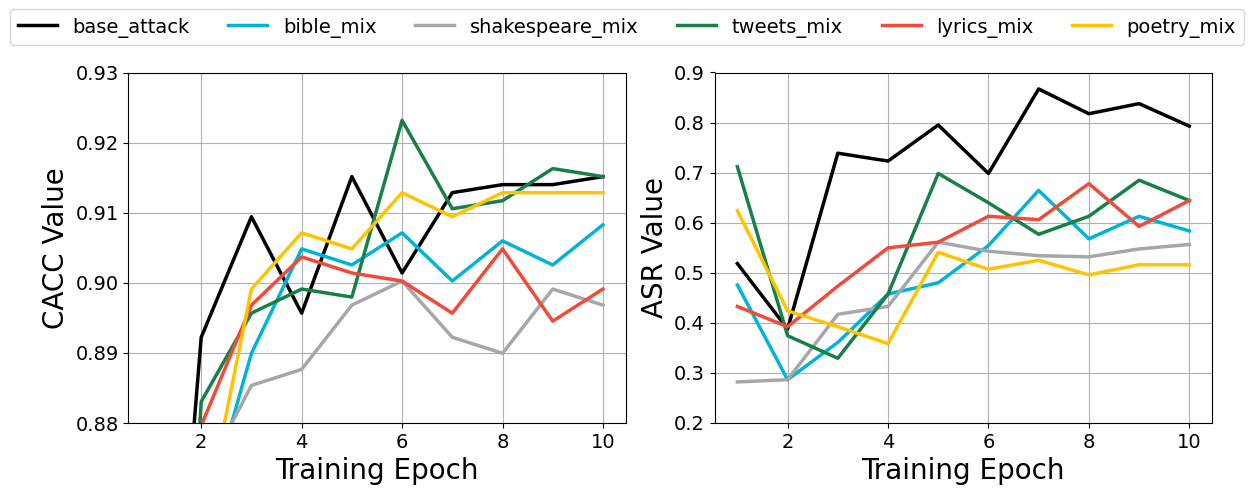

In [8]:
import json
import matplotlib.pyplot as plt

colors = ['#000000', '#00b4d8', '#a5a7ab', '#188047', '#F04A3A', '#FFC300']
line_size = 2.5
min_font_size = 14
max_font_size = 20
# 读取JSON文件
with open('models/sst-2/mix-synbkd-0.05/eval_loss.json', 'r') as file:
    data = json.load(file)

# 提取数据
categories = ['base_attack', 'bible_mix', 'shakespeare_mix', 'tweets_mix', 'lyrics_mix', 'poetry_mix']
dev_clean_data = {category: [data[category][str(i)]["dev-clean"] for i in range(1, 11)] for category in categories}
dev_poison_data = {category: [data[category][str(i)]["dev-poison"] for i in range(1, 11)] for category in categories}

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 绘制dev-clean的变化折线图
index = 0
for category in dev_clean_data:
    ax1.plot(range(1, 11), dev_clean_data[category], label=category, color=colors[index], linewidth=line_size)
    index += 1
ax1.set_xlabel('Training Epoch', fontsize=max_font_size)
ax1.set_ylabel('CACC Value', fontsize=max_font_size)
ax1.set_ylim(0.88, 0.93)
ax1.tick_params(labelsize=min_font_size)
# ax1.get_legend().remove()
ax1.grid(True)

# 绘制dev-poison的变化折线图
index = 0
for category in dev_poison_data:
    ax2.plot(range(1, 11), dev_poison_data[category], label=category, color=colors[index], linewidth=line_size)
    index += 1
ax2.set_xlabel('Training Epoch', fontsize=max_font_size)
ax2.set_ylabel('ASR Value', fontsize=max_font_size)
ax2.set_ylim(0.2, 0.9)
ax2.tick_params(labelsize=min_font_size)
# ax2.get_legend().remove()
ax2.grid(True)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=min_font_size, title_fontsize=min_font_size)

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig('fig/sst2_synbkd.pdf', dpi=500, bbox_inches='tight')
plt.show()